# Análisis entrópico para procesamiento de lenguajes naturales

## Programa para analizar los corpus 

### Primero cargamos las librerias necesarias:

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt


### Ahora cargamos a jupyter los corpus que se van utilizar:


In [2]:

#cien años de soledad
archivo1 = open(r"C:\Users\sebas\Google Drive\Fisica\Mecanica_Estadistica\Proyecto\cien_annos_soledad.txt",encoding="utf8",mode='r')
texto1 = archivo1.read()
#crimen y castigo
archivo2 = open(r"C:\Users\sebas\Google Drive\Fisica\Mecanica_Estadistica\Proyecto\crimenycastigo.txt",mode='r')
texto2 = archivo2.read()
#el retrato de dorian grey
archivo3 = open(r"C:\Users\sebas\Google Drive\Fisica\Mecanica_Estadistica\Proyecto\retrato.txt",mode='r')
texto3 = archivo3.read()
#el quijote
archivo4 = open(r"C:\Users\sebas\Google Drive\Fisica\Mecanica_Estadistica\Proyecto\el_quijote.txt",encoding="utf8",mode='r')
texto4 = archivo4.read()
#la isla del tesoro
archivo5 = open(r"C:\Users\sebas\Google Drive\Fisica\Mecanica_Estadistica\Proyecto\isladeltesoro.txt",mode='r')
texto5 = archivo5.read()
# sentido y sensibilidad
archivo6 = open(r"C:\Users\sebas\Google Drive\Fisica\Mecanica_Estadistica\Proyecto\sentidosensibilidad.es",encoding="utf8",mode='r')
texto6 = archivo6.read()

textoprueba= """"Hola, hola hola mundo. Esto es una cadena, se supone que debe tener varias palabras pues 
vamos a realizar un conteo de frecuencia de las mismas usando el lenguaje de programación Python. 
Ya no sé qué escribir pero sigo escribiendo para que poco a poco la cadena sea más larga y el 
ejercicio de programación sea demostrable. Creo que con todo esto que he escrito es suficiente"""

totaltext= texto1 + texto2 + texto3 + texto4 + texto5 + texto6


### Creamos una funcion para preparar y limpiar el texto:

Tomamos los libros convertidos en cadenas de texto, le quitamos caracteres que no son letras, convertimos todas las letras a minuscula y convertimos el texto en un arreglo

In [3]:
def preptext(text):
    texto=text
    quitar = "¡!¿?()[],=;_-:«<>».123456789*\n!\"'"
    for caracter in quitar:
        texto = texto.replace(caracter,"")
    texto = texto.lower()
    palabras = texto.split(" ")
    return palabras

### Creamos una funcion que nos cuente las palabras para un texto dado y retorne un diccionario:

Esta funcion nos retornara un diccionario en donde al buscar la palabra nos dirá cuantas veces aparece en el texto

In [4]:
def diccionario(words):
    palabras=words
    diccionario_frecuencias = {}
    for palabra in palabras:
        if palabra in diccionario_frecuencias:
            diccionario_frecuencias[palabra] += 1
        else:
            diccionario_frecuencias[palabra] = 1
    return diccionario_frecuencias

### Generamos los diccionarios para los corpus

In [5]:
dicc1= diccionario(preptext(texto1))
dicc2= diccionario(preptext(texto2))
dicc3= diccionario(preptext(texto3))
dicc4= diccionario(preptext(texto4))
dicc5= diccionario(preptext(texto5))
dicc6= diccionario(preptext(texto6))
diccprueba= diccionario(preptext(textoprueba))
dicctotal= diccionario(preptext(totaltext))


### Funciones para analizar los texto: conteo de palabras unicas, palabras totales, palabras de 4 letras y densidas de frecuencia segun tamaño de palabra.

la funcion words returna una pareja de numero donde el primero es el numero de palabras de 4 letras unicas que aparece y el segundo es el numero total de veces que aparecen palabras de 4 letras.

la funcion words4 recibe el diccionario y returna un diccionario pero de solo las palabras de 4 letras.

In [6]:
def words(diccionario):
    total=0
    for word in diccionario:
        total+= diccionario[word]
    return [len(diccionario),total]

def words4(diccionario):
    diccionario_4={}
    for word in diccionario:
        if len(word)== 4:
            diccionario_4[word]=diccionario[word]
    return diccionario_4


### Densidad de probabilidad segun tamaño de la palabra
Esta funcion retorna una pareja de listas, en donde la primera es el numero de veces que aparecen palabras unicas segun si tamaño, por ejemplo la posicion densidad[0][2] me indica el numero de palabras unicas de 3 letras que hay en el documento. Mientras que la segunda lista me dice el numero de palabras totales, es decir que tiene en cuenta si aparece varias veces una misma palabras.

In [33]:
def densidad(diccionario):
    densidad=[np.zeros(21),np.zeros(21)]
    for word in diccionario:
        for i in range(21):
            if len(word)==i:
                densidad[0][i]+=1
                densidad[1][i]+=diccionario[word]
    return densidad         
            

### Analisis de cada texto:

#### Texto 1: Cien años de soledad

In [39]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc1)[0]}', total de palabras '{words(dicc1)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc1))[0]}', total de palabras de 4 letras '{words(words4(dicc1))[1]}'")

El texto tiene:
palabras unicas'15701', total de palabras '139345'
palabras unicas de 4 letras'551', total de palabras de 4 letras '11197'


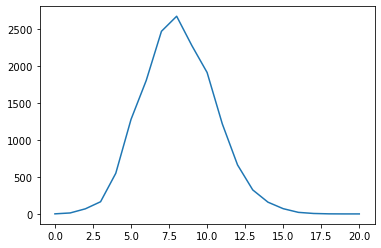

In [37]:
plt.plot(np.arange(21),densidad(dicc1)[0])

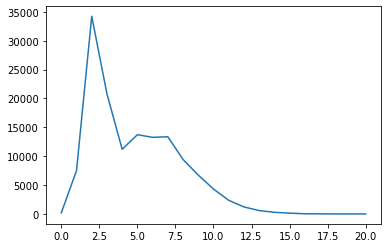

In [38]:
plt.plot(np.arange(21),densidad(dicc1)[1])

#### Texto 2: Crimen y castigo 

In [40]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc2)[0]}', total de palabras '{words(dicc2)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc2))[0]}', total de palabras de 4 letras '{words(words4(dicc2))[1]}'")

El texto tiene:
palabras unicas'27414', total de palabras '160469'
palabras unicas de 4 letras'709', total de palabras de 4 letras '14402'


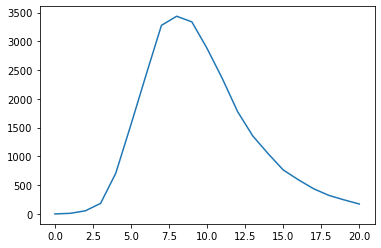

In [42]:
plt.plot(np.arange(21),densidad(dicc2)[0])

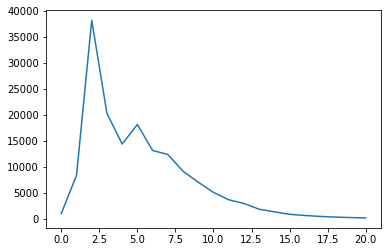

In [43]:
plt.plot(np.arange(21),densidad(dicc2)[1])

#### Texto 3: El retrato de Dorian Gray

In [44]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc3)[0]}', total de palabras '{words(dicc3)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc3))[0]}', total de palabras de 4 letras '{words(words4(dicc3))[1]}'")

El texto tiene:
palabras unicas'15649', total de palabras '70075'
palabras unicas de 4 letras'634', total de palabras de 4 letras '6536'


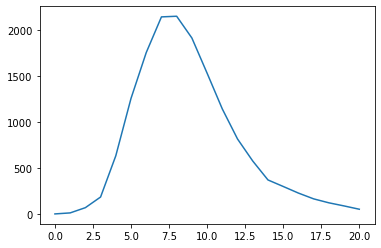

In [45]:
plt.plot(np.arange(21),densidad(dicc3)[0])

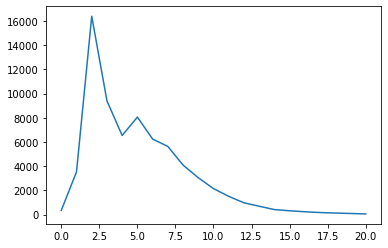

In [46]:
plt.plot(np.arange(21),densidad(dicc3)[1])

#### Texto 4: El Quijote de la mancha

In [48]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc4)[0]}', total de palabras '{words(dicc4)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc4))[0]}', total de palabras de 4 letras '{words(words4(dicc4))[1]}'")

El texto tiene:
palabras unicas'16180', total de palabras '184834'
palabras unicas de 4 letras'584', total de palabras de 4 letras '17908'


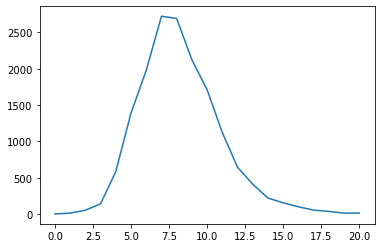

In [49]:
plt.plot(np.arange(21),densidad(dicc4)[0])

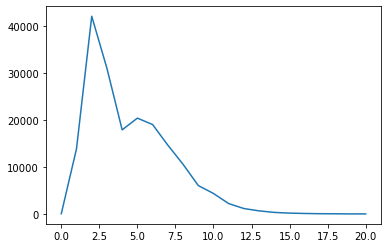

In [50]:
plt.plot(np.arange(21),densidad(dicc4)[1])

#### Texto 5: La isla del tesoro

In [51]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc5)[0]}', total de palabras '{words(dicc5)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc5))[0]}', total de palabras de 4 letras '{words(words4(dicc5))[1]}'")

El texto tiene:
palabras unicas'15971', total de palabras '81864'
palabras unicas de 4 letras'624', total de palabras de 4 letras '7891'


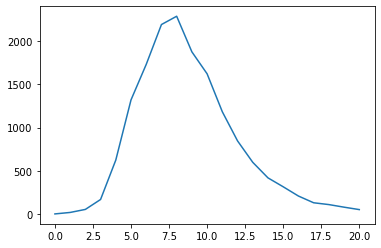

In [52]:
plt.plot(np.arange(21),densidad(dicc5)[0])

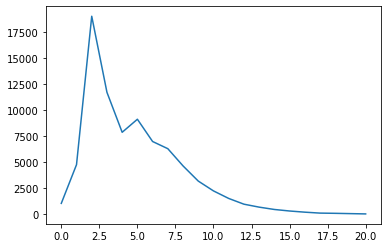

In [53]:
plt.plot(np.arange(21),densidad(dicc5)[1])

#### Texto 6: Sentido y Sensibilidad

In [54]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc5)[0]}', total de palabras '{words(dicc6)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc6))[0]}', total de palabras de 4 letras '{words(words4(dicc6))[1]}'")

El texto tiene:
palabras unicas'15971', total de palabras '1938316'
palabras unicas de 4 letras'2251', total de palabras de 4 letras '167820'


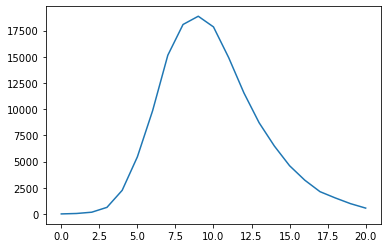

In [55]:
plt.plot(np.arange(21),densidad(dicc6)[0])

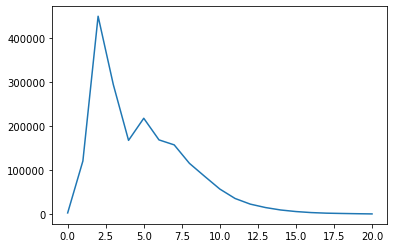

In [56]:
plt.plot(np.arange(21),densidad(dicc6)[1])

#### Suma de todos los textos:

In [57]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicctotal)[0]}', total de palabras '{words(dicctotal)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicctotal))[0]}', total de palabras de 4 letras '{words(words4(dicctotal))[1]}'")

El texto tiene:
palabras unicas'180750', total de palabras '2574898'
palabras unicas de 4 letras'2668', total de palabras de 4 letras '225754'


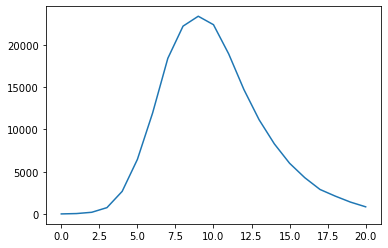

In [58]:
plt.plot(np.arange(21),densidad(dicctotal)[0])

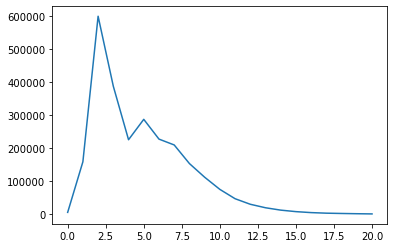

In [59]:
plt.plot(np.arange(21),densidad(dicctotal)[1])